In [1]:
import pandas as pd
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import bokeh as bk

In [2]:
import wordcloud

ImportError: No module named PIL

# Read the reviews dataset

In [ ]:
import pandas as pd
import json
import datetime as dt

In [ ]:
from nltk.corpus import stopwords
#stopwords.words("english")

In [ ]:
import nltk
nltk.download("stopwords")

# Clean up the text

In [ ]:
import re
from nltk.corpus import stopwords
def clean_text(text_list):
    clean_text_list = []
    for text in text_list:
        text = re.sub("[^A-Z,a-z]"," ",text)
        #print text
        words = re.split(",|;| |\s+",text)
        stop_words = set(stopwords.words("english"))
        clean_text_list = clean_text_list + [' '.join([word for word in words if word and  not (word in stop_words)])]
    return clean_text_list
    #print words

# Make bag of words features

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
def words_to_bow(words):
    vectorizer = CountVectorizer(analyzer = "word",\
                                tokenizer = None,\
                                preprocessor = None,\
                                stop_words = None,\
                                max_features = 5000)
    features = vectorizer.fit_transform(words)
    feature_names = vectorizer.get_feature_names()
    return (features,feature_names)
    

In [ ]:
text = ["In the IMDB data, we have a very large number of reviews, which will give us a large vocabulary. To limit the size of the feature vectors, we should choose some maximum vocabulary size. Below, we use the 5000 most frequent words (remembering that stop words have already been removed)."]

In [ ]:
text= clean_text(text)
print text

In [ ]:
bow,feature_names = words_to_bow(text)
print bow,feature_names

In [ ]:
len(feature_names)

In [ ]:
text_list = []
fh_in = open("./data/reviews_Electronics_5.json")
fh_out = open("./data/reviews_bow","a")
data = pd.DataFrame()
start = dt.datetime.now()
for i,line in enumerate(fh_in):
    #print i, line
    
    review_text = json.loads(line)["reviewText"]
    review_id = json.loads(line)["reviewerID"]
    #print json.loads(line)
    text_list = text_list +[(review_id, review_text)]
    if i % 1e6 == 0 and i !=0:
        time_now = dt.datetime.now()
        text_list_cln = clean_text([x[1] for x in text_list])
        bow,feature_names = words_to_bow(text_list_cln)
        #fh_out.write('\n'.join(bow))
        text_list = []
        print "read %d lines in %s" %(i,time_now-start)
    if i == 3e5:
        break
    #if i == 100:
    #    break
    
fh.close()
end = dt.datetime.now()
print "read in", end-start
#data.head(6)

In [ ]:
i

In [ ]:
text_list = list(data["reviewText"])

In [ ]:
len(text_list)

In [ ]:
start = dt.datetime.now()
text_list_cln = clean_text(text_list)
print text_list_cln[0:2]
end = dt.datetime.now()
print "cleaning text took", end - start

In [ ]:
len(text_list_cln)

In [ ]:
start = dt.datetime.now()
bow,features = words_to_bow(text_list_cln)
#print bow[0:2]
print features
end = dt.datetime.now()
print "bow analysis took", end - start

In [ ]:
bow.shape

In [ ]:
import ijson as ij
fh = open("./data/reviews_Electronics_5.json")
parser = ij.parse(fh)


In [ ]:
for item in ij.items(fh, "item"):
    print item

# Read the json file and save it to SQLITE DATABASE

In [ ]:
import datetime as dt
start = dt.datetime.now()
chunksize = 20000
j = 0
index_start = 1

for df in pd.read_json('./data/reviews_Electronics_5.json',  encoding='utf-8',\
                       orient = "records", lines = True,):
    
    #df = df.rename(columns={c: c.replace(' ', '') for c in df.columns}) # Remove spaces from columns

    #df['CreatedDate'] = pd.to_datetime(df['CreatedDate']) # Convert to datetimes
    #df['ClosedDate'] = pd.to_datetime(df['ClosedDate'])

    df.index += index_start

    # Remove the un-interesting columns
   
    #for c in df.columns:
    #    if c not in columns:
    #        df = df.drop(c, axis=1)    

    
    j+=1
    print '{} seconds: completed {} rows'.format((dt.datetime.now() - start).seconds, j*chunksize)

    df.to_sql('data', disk_engine, if_exists='append')
    index_start = df.index[-1] + 1


# Scraping Verge reviews

In [ ]:
import requests
import urllib2
from bs4 import BeautifulSoup as bs

In [ ]:
import webscrape

In [ ]:
base_url = 'http://www.theverge.com/phone-review/archives'

In [ ]:
help (webscrape.get_all_urls_from_pages)

In [ ]:
all_urls = webscrape.get_all_urls_from_pages(base_url,range(1,100))

In [ ]:
fh = open("./data/verge_urls","w")
fh.write('\n'.join(all_urls))
fh.close()

In [ ]:
help(webscrape.read_data_from_url)

In [ ]:
webscrape.read_data_from_url(all_urls, "./verge")

In [ ]:
reload(webscrape)

In [ ]:
temp = webscrape.read_body_from_url("./verge/moto-x-review")

In [ ]:
fh = open("./verge/alcatel-onetouch-idol-3-review").read()
bs.prettify(fh)

In [ ]:
for element in temp:
    print element

In [ ]:
for data in data_bs.find_all("p"):
    print data.get_text()

In [ ]:
data = urllib2.urlopen("http://www.theverge.com/2015/8/31/9231201/moto-x-play-review#comments")
data_bs = bs(data,"lxml")
print data_bs.prettify()
data_list = data_bs.find_all("div", class_ ="comment comment_inner")

In [ ]:
data_list

In [ ]:
from selenium import webdriver
browser = webdriver.chrome

In [ ]:
%load_ext autoreload
%autoreload 2

In [4]:
import webscrape

In [5]:
webscrape.abc_def()

its really working


In [6]:
n6p = "./verge/nexus-6-review"

In [7]:
n6p_review = webscrape.read_body_from_url(n6p)

In [8]:
import word_pre_process

In [9]:
n6p_review_clean =[' '.join(word_pre_process.clean_text(n6p_review))]


In [23]:
n6p_review_bow,features = word_pre_process.words_to_ngram(n6p_review_clean,1,1)

In [24]:
import pandas as pd

In [25]:
df = pd.DataFrame(n6p_review_bow.toarray(), columns = list(features))

In [26]:
x_axis = list(features)
y_axis = n6p_review_bow.toarray()
data = [(x,y) for (x,y) in zip(x_axis,y_axis[0])]
data = sorted(data, key = lambda x: -x[1])

In [27]:
df = pd.DataFrame(data)

In [28]:
df.head()

,0,1
0,nexus,22
1,android,14
2,it,13
3,phone,13
4,screen,13


In [29]:
import plotly.plotly as py
from plotly.graph_objs import Bar, Scatter, Marker, Layout, Figure

In [37]:
data = [Bar(
            x=df[0],y=df[1],
            marker=dict(
                color='rgb(255,0,0)',
                line=dict(
                    color='rgb(255,0,0)',
                    width=0.5),
            ),
            opacity=0.6
        )]

fig = Figure(data=data)
py.iplot({'data': data},  title='Relative Number of 311 Complaints by City', validate = False)

In [17]:
py.sign_in("tnkarthik","THgXlwYUiGXRThjKzPfB")

In [20]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS

In [45]:
from PIL import Image as im

In [22]:
icon = Image.open("./cf1nuXC0.jpg")
mask = Image.new("RGB", icon.size, (255,255,255))
mask.paste(icon,icon)
mask = np.array(mask)

ValueError: bad transparency mask

In [19]:
from PIL import Image
from numpy import array
img = Image.open("./cf1nuXC0.jpg").convert('LA')
arr = array(img)

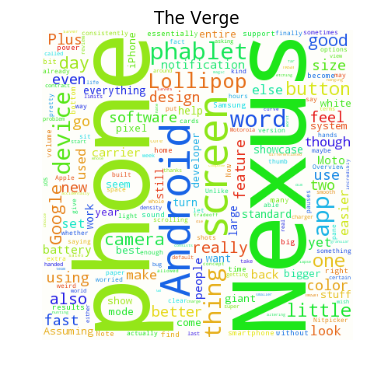

In [31]:
wordcloud_verge = WordCloud(background_color= 'rgb(254,254,250)',
                      width=400,
                      height=400
                     ).generate(n6p_review_clean[0])

plt.imshow(wordcloud_verge)
plt.axis('off')
plt.title("The Verge")
plt.savefig('./static/nexus-6p-verge.png', dpi=300)
plt.show()

In [62]:
f, (ax1, ax2) = plt.subplots(1, 2)
ax1.imshow(wordcloud_tc)
ax1.axis('off')
ax1.set_title("Tech Crunch")
ax2.imshow(wordcloud_verge)
ax2.axis('off')
ax2.set_title("The Verge")
f.show()

In [65]:
f.savefig("./static/n6p-tc-v.png", dpi = 300)

In [27]:
tc = "https://techcrunch.com/2015/10/19/nexus-6p-review-this-is-the-android-device-that-youve-been-waiting-for"

In [28]:
!mkdir ./techcrunch

mkdir: cannot create directory ‘./techcrunch’: File exists


In [31]:
webscrape.read_and_save_url([tc],folder_to_write="./techcrunch")

Currently reading nexus-6p-review-this-is-the-android-device-that-youve-been-waiting-for at https://techcrunch.com/2015/10/19/nexus-6p-review-this-is-the-android-device-that-youve-been-waiting-for


In [30]:
ls ./techcrunch/

nexus-6p-review-this-is-the-android-device-that-youve-been-waiting-for


In [33]:
review_6p_tc = webscrape.read_body_from_url("./techcrunch/nexus-6p-review-this-is-the-android-device-that-youve-been-waiting-for")

In [35]:
review_6p_tc_clean = word_pre_process.clean_text(review_6p_tc)

In [36]:
review_6p_tc_clean

[u'Sundar Pichai made first public presentation Google CEO last month showed slew new hardware devices One two phones announced Nexus P Huawei For flagship Nexus phones bigger necessarily better Let find',
 u'New phones exciting They look new feel new new things everyone loves new I starting feel phone fatigue though I love new technology I feel like incremental updates come along Android phones Apple phones starting get overwhelming It used case device aficionados would pick S version iPhones every year Nexus Not much anymore especially since carriers Apple urging opt plans make sure always new new',
 u'The Nexus P made Huawei one two new flagship Nexus phones In many ways two phones Google answer Apple iPhones While Google gone back making hardware clearly work closely partners',
 u'At Google event last month chatted Jeff Hoefer Google Industrial Design Manager He shed light things designed way especially P They designed purpose purpose shake consumers enough buy one',
 u'The P crown

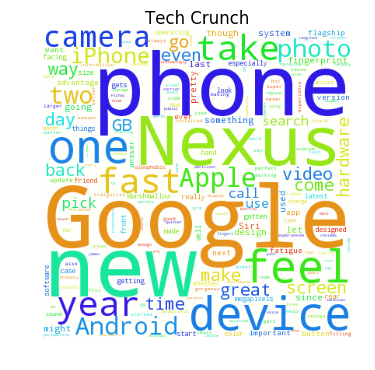

In [49]:
wordcloud_tc = WordCloud(background_color= 'rgb(254,254,250)',
                      width=400,
                      height=400,
                      stopwords = STOPWORDS
                     ).generate(' '.join(review_6p_tc_clean))

plt.imshow(wordcloud_tc)
plt.axis('off')
plt.title("Tech Crunch")
plt.savefig('./static/nexus-6p-tc.png', dpi=300)
plt.show()

In [48]:
ls ./static

100px-The_Verge_Logo_2016.svg.png  nexus-6p-verge.png
nexus-6p-tc.png                    test.png
